- __Process-__

> get a trained model

> calculate the loss function

> return the data into orignal orde

In [1]:
#import eli5
#from eli5.sklearn import PermutationImportance


from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [5]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [7]:
# 
y = (data['Man of the Match'] == 'Yes')
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]  #choosing integer values
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

my_model = RandomForestClassifier(n_estimators = 100, 
                                 random_state = 0).fit(train_X, train_y)


## [eli5](https://eli5.readthedocs.io/en/latest/) library for permutation importance

## Practice

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt


data2= pd.read_csv('train.csv')

In [2]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [3]:
data2.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [4]:
data2.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
# Remove data with extreme outlier coordinates or negative fares
data2 = data2.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

In [5]:
# assigning prediction target

y = data2.fare_amount

base_features = ['pickup_longitude', 
                'pickup_latitude', 
                 'dropoff_longitude', 
                'dropoff_latitude', 
                'passenger_count']
X = data2[base_features]

In [6]:
# train the model
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
first_model = RandomForestRegressor(n_estimators = 50, random_state = 1).fit(train_X, train_y)

In [7]:
train_X.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000
mean,-72.520688,39.931410,-72.514256,39.930631,1.670827
std,10.360818,6.010290,10.378988,6.014321,1.293083
min,-75.414728,-74.006893,-84.654241,-74.006377,0.000000
25%,-73.992092,40.735008,-73.991196,40.734333,1.000000
50%,-73.981811,40.752825,-73.980012,40.753397,1.000000
75%,-73.967051,40.767428,-73.963292,40.768243,2.000000
max,40.783472,42.160275,40.802437,42.168717,6.000000


In [8]:
train_y.describe()

count    37500.000000
mean        11.402322
std          9.715174
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

In [16]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state =1)
first_model = RandomForestRegressor(n_estimators = 50, random_state = 1).fit(train_X, train_y)

In [9]:
from sklearn.inspection import permutation_importance

In [10]:
result = permutation_importance(first_model, train_X, train_y, n_repeats=30, random_state=0)

In [11]:
# resulting importances
importance_df = pd.DataFrame({'feature': base_features,
                         'importance_mean': result.importances_mean,
                         'importance_std' : result.importances_std})
importance_df = importance_df.sort_values('feature', 
                                         ascending = False)

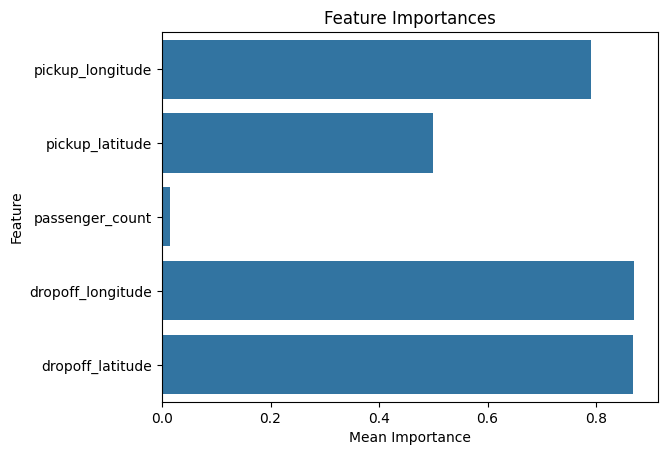

In [12]:
# visualize 
sns.barplot(x = 'importance_mean', y = 'feature', data= importance_df)
plt.title('Feature Importances')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.show()

## Hypothesis testing

> Why are latitudes have larger effect? 

1. Travel might tend to have greater latitude distances than longitude distances.

2. Different parts of the city might have different pricing rules (e.g. price per mile), and pricing rules could vary more by latitude than longitude. 

3. Tolls might be greater on roads going North<->South (changing latitude) than on roads going East <-> West (changing longitude). Thus latitude would have a larger effect on the prediction because it captures the amount of the tolls.

In [39]:
# reducing length of X
X_trimmed = X.iloc[:len(y)]

In [13]:
# create new features

data2['abs_lon_change'] = abs(data2.dropoff_longitude - data2.pickup_longitude)
data2['abs_lat_change'] = abs(data2.dropoff_latitude - data2.pickup_latitude)

features_2 = ['pickup_longitude', 
                'pickup_latitude', 
                 'dropoff_longitude', 
                'dropoff_latitude', 
                'passenger_count',
             'abs_lon_change',
             'abs_lat_change']
X= data2[features_2]

new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state = 1)
second_model = RandomForestRegressor(n_estimators = 50, random_state = 1).fit(new_train_X, new_train_y)

In [14]:
result2 = permutation_importance(second_model, new_train_X, new_train_y, n_repeats=30, random_state=1)

In [16]:
# resulting importances
importance_df2 = pd.DataFrame({'feature': features_2,
                         'importance_mean': result2.importances_mean,
                         'importance_std' : result2.importances_std})
importance_df2 = importance_df2.sort_values('feature', 
                                         ascending = False)

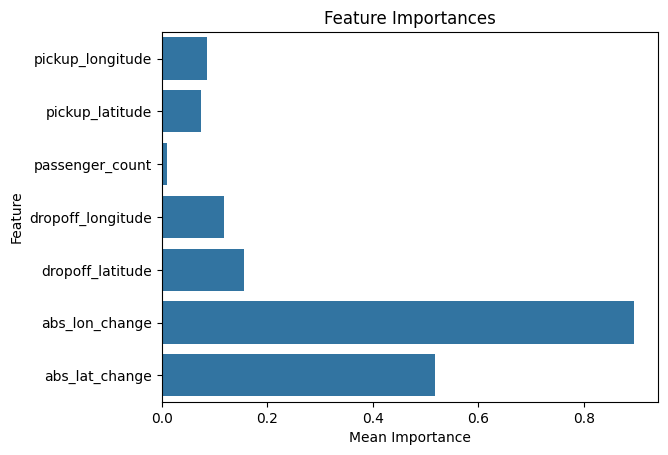

In [19]:
# visualize 
sns.barplot(x = 'importance_mean', y = 'feature', data= importance_df2)
plt.title('Feature Importances')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.show()

In [36]:
X.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lon_change,abs_lat_change
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-72.509756,39.933759,-72.504616,39.926251,1.667840,0.151433,0.097776
std,10.393860,6.224857,10.407570,6.014737,1.289195,3.077049,2.326365
min,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,0.000000
25%,-73.992062,40.734880,-73.991152,40.734372,1.000000,0.005778,0.006602
50%,-73.981840,40.752678,-73.980082,40.753372,1.000000,0.012526,0.013928
75%,-73.967148,40.767360,-73.963584,40.768167,2.000000,0.023967,0.027085
max,40.783472,401.083332,40.851027,43.415190,6.000000,74.014917,360.304405


In [37]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_longitude   50000 non-null  float64
 1   pickup_latitude    50000 non-null  float64
 2   dropoff_longitude  50000 non-null  float64
 3   dropoff_latitude   50000 non-null  float64
 4   passenger_count    50000 non-null  int64  
 5   abs_lon_change     50000 non-null  float64
 6   abs_lat_change     50000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.7 MB
None


In [38]:
print(y.info())

<class 'pandas.core.series.Series'>
Index: 31289 entries, 2 to 49999
Series name: fare_amount
Non-Null Count  Dtype  
--------------  -----  
31289 non-null  float64
dtypes: float64(1)
memory usage: 488.9 KB
None
